## Chapter 10. Diagnostics of Regression Models

In [ ]:
library(tidyverse)
library(latex2exp)
df<- read_table2("C:/Users/Lee Sak Park/Desktop/Spring 2020/Linear Model/Notes/data_set.txt", 
                 col_names = FALSE)
colnames(df) = c("Y",'X1','X2','X3')
y = df$Y %>% as.matrix
J = rep(1, length(y))
X = cbind(J, df[c('X1','X2','X3')]) %>% as.matrix
colnames(y) = NULL
colnames(X) = NULL

### $\S$10.1 Added-Variable Plots

__Model1__ : $\hat{Y}_i (X_2) = b_0 + b_2 X_{i2}$

&nbsp; &nbsp; &nbsp; $\rightarrow e_i (Y | X_2) = Y_i - \hat{Y} (X_2)$


__Model2__ : $\hat{X}_{i1} (X_2) = b^*_0 + b^*_2 X_{i2}$

&nbsp; &nbsp; &nbsp; $\rightarrow e_i (X_1 | X_2) = X_{i1} - \hat{X}_{i1} (X_2)$

$\Rightarrow$ draw the scatter plot between $e_i (Y | X_2)$ and $e_i (X_1 | X_2)$

In [2]:
model1 = lm(Y~X2, data = df)
model2 = lm(X1~X2, data = df)

e_y = residuals(model1)
e_x = residuals(model2)

Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"

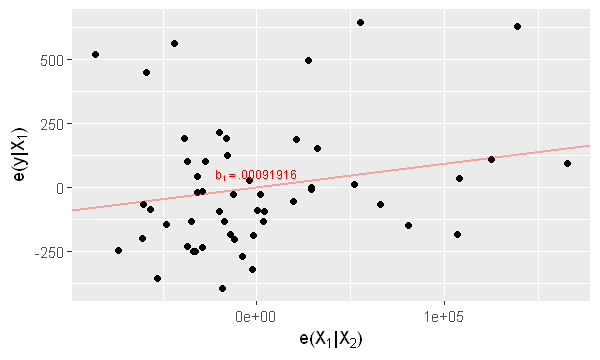

In [3]:
options(repr.plot.width=5, repr.plot.height=3)
# ggplot
ggplot()+
geom_point(aes(x = e_x, y = e_y)) + 
xlab (TeX("$e(X_1 | X_2)$")) +
ylab (TeX("$e(y | X_1)$"))+
geom_abline(slope = coefficients(lm(e_y -1 ~ e_x))[[2]], color = "red", size = .8, alpha = .3) +
annotate(geom="text", x=0, y=50, label=TeX("$b_1 = .00091916$"), color="red", size = 2.5)

<center> $e \hat{(Y | X_2)} = b_1 \cdot e(X_1 |X_2)  $</center>

In [4]:
anova(lm(e_y~0+ e_x))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
e_x,1,130697.2,130697.24,2.207107,0.1435318
Residuals,51,3020043.8,59216.54,NA,NA


In [5]:
anova(lm(Y ~ X2+ X1, data = df))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
X2,1,11394.92,11394.92,0.1848818,0.6690961
X1,1,130697.24,130697.24,2.1205537,0.1517121
Residuals,49,3020043.76,61633.55,NA,NA


__Note__: "An added-variable plot only suggests the nature of the functional relation in which a predictor variable should be added to the regression model but does not provide an analytic expression of the relation"

### $\S$ 10.2 Outliers with respect to Y

<font size = 3> __Studentized Residuals__ </font>

estimator of the standard deviation of $e_i$:

$S^2 \{ e_i \} = MSE \cdot (1-h_{ii}) \Rightarrow S \{ e_i \} = \sqrt{MSE \cdot (1-h_{ii})}$

studentized residual ($r_i$) : 

$r_i = \frac{e_i}{S \{ e_i \}} = \frac{e_i}{\sqrt{MSE \cdot (1-h_{ii})}}$

<font size = 3> __Deleted Residuals__ </font>

$d_i = Y_i - \hat{Y}_{i(i)}$, where $\hat{Y}_{i(i)}$ is the expected value when the X levels are those of the i$^{th}$ case, __*after deleting the i$^{th}$ case*__

$d_i = \frac{e_i}{1-h_{ii}}$ and

$S^2 \{ d_i \} = MSE_{(i)} \cdot ( 1 + X^t_i (X^t_{(i)} X_{(i)})^{-1} X_i ) = \frac{MSE_{(i)}}{1-h_{ii}}$

Then, it follows that

<center> $\frac{d_i}{S \{ d_i \} }$ ~ $t_{n - p - 1}$  </center>

<font size = 3> __Another equation for $t_i$__ </font>

$ t_i = \frac{d_i}{S \{ d_i \} } = \frac{e_i}{\sqrt{ MSE_{(i)} \cdot (1-h_{ii})  }} = e_i \big[ \frac{n-p-1}{SSE \cdot (1-h_{ii}) - e_i^2}   \big]^{\frac{1}{2}}$

$\because (n-p) \cdot MSE = (n-p-1) \cdot MSE_{(i)} + \frac{e_i^2}{ (1-h_{ii})}$


<font size = 3.5> __For the outlier test, use the Bonferroni critical value, $t_{(1- \alpha/2n ; n-p-1)}$__ </font>

In [6]:
# Define the variables
model = lm(Y~., data = df)
SSE = anova(model)[2] %>% sum
e = residuals(model) %>% as.vector
e_sq = residuals(model)^2 %>% as.vector
H = X %*% solve(t(X) %*% X) %*% t(X)
h = diag(H)
num = 52-4-1 # n-p-1

# Define t-values
t = e*(num/(SSE*(1-h)-e_sq))^.5
abs_t = abs(t)

critical_values = rep(qt(1-.05/(2*52), num), length(h))

#Find how many of the t's are greater than the critical values
sum(t>critical_values)

[1] 0

<font size = 3>  __$\therefore$ We do not have an outlier with repect to Y__ </font>